In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modeling-ann/Churn_Modelling.csv


In [2]:
!pip install tensorflow-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 24.4 MB/s eta 0:00:00
^C
ERROR: Operation cancelled by user


In [3]:
# Import tensorflow and check the version
import tensorflow as tf
print(tf.__version__)

2.6.4


In [4]:
## import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
## read the data
dataset = pd.read_csv("../input/churn-modeling-ann/Churn_Modelling.csv")

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here we will see either the custmer is exited or not.
If Exited then what is reason behind this and is any balance amount is there which need to be payback from customer to bank.
If not exited we need to give some form facility like reward, credit limit enhancement,encorage to buy new products of the bank.

In [7]:
dataset.shape

(10000, 14)

In [8]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
## Divied the dataset into dependent and independent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

Here we removed the 'RowNumber','CustomerId','Surname' columns are not important features.
our taget feature is 'Exited' column.

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [12]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
X['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Now we will do the feature engineer as we see there are two categorical columns i.e. 'Geography' and 'Gender'.
Also we can see the less unique values in both the columns. So we can do the One-Hot encoding or Get dummies in pandas(pd.get_dummies(<Column_name>)).

In [14]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [15]:
gender = pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [16]:
## Concatinate the above two get_dummies variable.
## So we will drop the 'geography' and 'Gender' column.
## Note :- axis=1 is for column and axis=0 is for rows.
X=X.drop(['Geography','Gender'],axis=1)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
X = pd.concat([X,geography,gender],axis=1)

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Now the feature engineering is completed , now will do the train and test split.

In [20]:
##Splitting the dataset into train and test set.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
## Feature Scalling
## StandardScaler (based on the Z-score) is used in ANN
## MinMaxScaler ([0,1],[-1,1]) is used in CNN 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Note :- to avoid the data leakage we are using the Fit_transform instead of transform.

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


### Part-2 Now lets create the ANN 

In [25]:
## import tensorflow packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

### Initialize the ANN

In [26]:
classifier = Sequential()

2022-05-30 12:01:02.053454: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Adding the input layers
#### We will create 11 Input layers as shape are
(8000, 11)
(2000, 11)

In [27]:
classifier.add(Dense(units=11,activation='relu'))

### Adding the 1st Hidden Layer 

In [49]:
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

### Adding the 2nd Hidden Layer 

In [50]:
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

### Adding the Output Layer

In [51]:
classifier.add(Dense(units=1,activation='sigmoid'))

### Train the whole Neural network
##### Here the Learning Rate is  0.1 by the 'adam' optimizer.

In [52]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### If we want we can update the learning rate by the below step

In [32]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
# classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

### Early Stopping
##### Stop the training when a monitored metric has stopped imporving.


In [53]:
import tensorflow as tk
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

### Fit the nueral model

In [54]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5693 - accuracy: 0.7931 - val_loss: 0.5152 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5246 - accuracy: 0.7962 - val_loss: 0.4929 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4934 - accuracy: 0.7962 - val_loss: 0.4627 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4755 - accuracy: 0.7962 - val_loss: 0.4544 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4617 - accuracy: 0.7962 - val_loss: 0.4503 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4644 - accuracy: 0.7962 - val_loss: 0.4479 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4607 - accuracy: 0.7962 - val_loss: 0.4471 - val_accuracy:

### See the Model History
#### We can see the what all the parameters we are specicfic.

In [55]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Summarize the history of the Accuracy

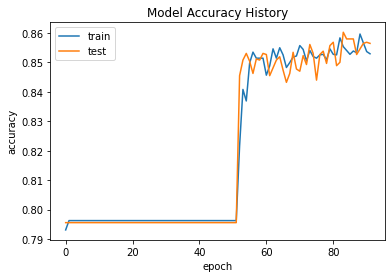

In [56]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy History')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc= "upper left")
plt.show()

### Summarize the history of the Loss

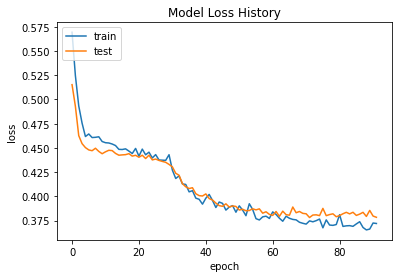

In [57]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss History')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc= "upper left")
plt.show()

### Making the Prediction and evaluation of the model

#### Predicting the Test set results

In [58]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred >= 0.5)
### Here if the y_pred >= 0.5 then 1 otherwise the 0.  

### Make the confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1495,  100],
       [ 200,  205]])

### Now calculate the accuracy score

In [60]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.85

### Check the weights value

In [61]:
classifier.get_weights()

[array([[-0.01474116, -0.07083007, -0.14921363,  0.00199246, -0.4812837 ,
         -0.00689267, -0.2907994 , -0.42669767, -0.16398571,  0.1918929 ,
         -0.2075794 ],
        [-0.07982554, -0.01414238,  0.59083086, -0.13063584,  0.43158558,
          0.06999383, -0.51405305,  0.5815107 ,  1.3862801 , -0.28800234,
          0.10056214],
        [ 0.02859773,  0.05654848, -0.25486892,  0.35655105,  0.25297397,
          0.07246476, -0.33237618,  0.04449701, -0.03207798,  0.6566089 ,
         -0.2647837 ],
        [-0.7234619 , -0.15236324,  0.8200917 ,  1.3189813 , -0.18878978,
         -0.36152804,  0.35461137, -0.00561501, -0.15894626,  0.45006102,
         -0.53184086],
        [ 1.3392833 , -0.09270074,  1.2746147 ,  0.00407261,  0.02577089,
         -1.5979283 ,  0.801831  ,  0.30978486, -0.810214  , -0.26220196,
         -0.23513001],
        [-0.02955988, -0.45076817,  0.08004922,  0.03858718, -0.13308537,
         -0.08073399,  0.14403145, -0.09578511, -0.11801951, -0.0406516